<a href="https://colab.research.google.com/github/Mamedova-S/VKR_Mamedova/blob/main/src/text/preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Важно отметить, что выявление депрессии только на основе текстовых данных является сложной задачей, требующей комплексного подхода, учитывающего множество факторов.

https://www.kaggle.com/datasets/kazanova/sentiment140  
https://www.kaggle.com/datasets/nikhileswarkomati/suicide-watch  
https://www.kaggle.com/datasets/infamouscoder/depression-reddit-cleaned   
https://www.kaggle.com/datasets/gargmanas/sentimental-analysis-for-tweets  
 



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Установка необходимых библиотек

In [2]:
# Раскомментировать, если библиотеки не установлены


!pip install ftfy
!pip install transformers
!pip install fasttext
!pip install tensorflow
!pip install contractions
!pip install tensorflow_text
!pip install tensorflow.keras

!pip install tensorflow.keras.preprocessing.text 
!pip install tensorflow.keras.preprocessing.sequence 
!pip install tensorflow.keras.utils 
!pip install tensorflow.keras.models 
!pip install tensorflow.keras.layers

# !pip install scikit-learn
# !pip install gensim
# !pip install nltk
# !pip install textblob
# !pip install neattext
# !pip install dask
# !pip install keras
# !pip install numpy
# !pip install tensorflow_hub
# !pip install tensorflow_text




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 2.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 96.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.4-py3-none-any.whl (222 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4393320 sha256=1e06e893f12e7800c7a2739d74af8cf33ba128aba9f31d3660202d3173310f5a
  Stored in directory: /root/.cache/pi

# Импорт библиотек

In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import string
import ftfy
import dask
import gensim
import fasttext
import joblib
import pickle
import random
import math
import contractions
import unicodedata
import spacy

from collections import Counter
from copy import deepcopy

from re import sub
from time import time
from keras.models import load_model
from datetime import datetime
from ftfy import fix_text
from wordcloud import WordCloud

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers


import gensim.downloader as api
from gensim import models
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models.keyedvectors import KeyedVectors
from gensim.models import Word2Vec

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

from transformers import TFBertModel, BertTokenizer
from transformers import AutoTokenizer, AutoModel

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# dask для распараллеливания
from dask.diagnostics import ProgressBar
import dask.dataframe as dd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# Импорт данных

In [4]:
dataset1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/VKR_Depression/Dataset/training.csv',encoding='ISO-8859-1',header=None)
dataset2= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/VKR_Depression/Dataset/Suicide_Detection.csv')
dataset3=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/VKR_Depression/Dataset/depression_dataset_reddit_cleaned.csv')
dataset4=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/VKR_Depression/Dataset/sentiment_tweets3.csv')

In [5]:
dataset1

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [6]:
dataset2

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...,...
232069,348103,If you don't like rock then your not going to ...,non-suicide
232070,348106,You how you can tell i have so many friends an...,non-suicide
232071,348107,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,348108,The usual stuff you find hereI'm not posting t...,suicide


In [7]:
dataset3

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1
...,...,...
7726,is that snow,0
7727,moulin rouge mad me cry once again,0
7728,trying to shout but can t find people on the list,0
7729,ughh can t find my red sox hat got ta wear thi...,0


In [8]:
dataset4

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


In [9]:
# Удалим ненужные столбцы в датасетах
dataset2 = dataset2.drop('Unnamed: 0',axis=1)
dataset1 = dataset1.drop([1,2,3,4],axis=1)
dataset4 = dataset4.drop('Index',axis=1)
dataset1.columns=['target','text']
dataset2.columns=['text', 'target']
dataset3.columns=['text', 'target']
dataset4.columns=['text', 'target']

In [10]:
# Model the sentiments as binary (0 - negative, 1 - positive)
dataset1.target=dataset1.target.replace(to_replace=4,value=1)
dataset1.target.value_counts()

0    800000
1    800000
Name: target, dtype: int64

Negative    800000
Positive    800000
Name: target, dtype: int64


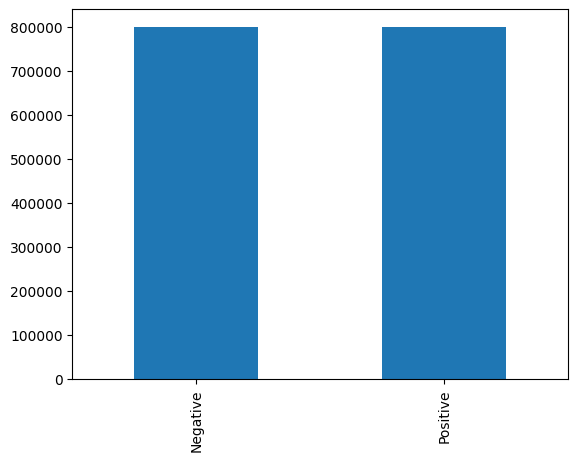

In [11]:
# Visualising the distribution of the target variable.
sentiment = {0:"Negative", 1:"Positive"}
print(dataset1.target.apply(lambda x: sentiment[x]).value_counts())
dataset1.target.apply(lambda x: sentiment[x]).value_counts().plot(kind = 'bar')
plt.show()

<Axes: >

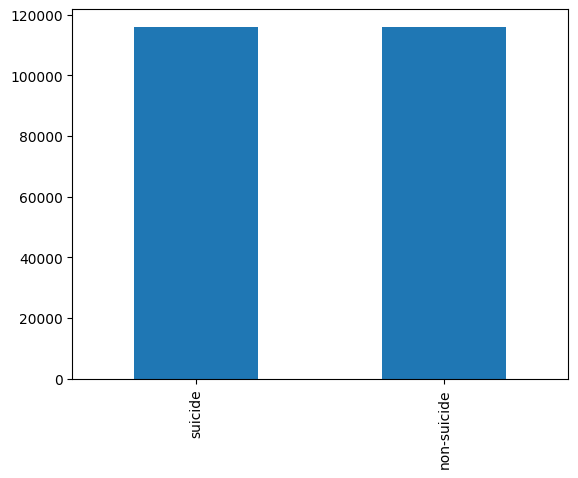

In [12]:
dataset2.target.value_counts().plot.bar()


In [13]:
dataset2.target=dataset2.target.replace(to_replace="suicide",value=1)
dataset2.target=dataset2.target.replace(to_replace="non-suicide",value=0)
dataset2.target.value_counts()


1    116037
0    116037
Name: target, dtype: int64

In [14]:
dataset2

,text,target
0,Ex Wife Threatening SuicideRecently I left my ...,1
1,Am I weird I don't get affected by compliments...,0
2,Finally 2020 is almost over... So I can never ...,0
3,i need helpjust help me im crying so hard,1
4,"I’m so lostHello, my name is Adam (16) and I’v...",1
...,...,...
232069,If you don't like rock then your not going to ...,0
232070,You how you can tell i have so many friends an...,0
232071,pee probably tastes like salty tea😏💦‼️ can som...,0
232072,The usual stuff you find hereI'm not posting t...,1


Как видно из графиков, у нас одинаковое количество позитивных/негативных твитов. Оба равны 800 000 твитов. Это означает, что наш набор данных не перекошен, что облегчает нам работу с набором данных.

# Предобработка текста 
Очистка текста от url-адресов, хэштегов, упоминаний и других неалфавитных символов. Преобразование текста в нижний регистр, удаление стоп-слов, стемминг, лемматизация

In [15]:
# Define a function to preprocess the text
def preprocess_basic(text):
    # résumé -> resume
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    # i'm -> i am
    text = contractions.fix(text)
    # emojis, dll  "I am so happy! 😭😭😭 $ &" -> I am so happy! 
    re.sub(r'[^a-zA-z0-9.,!?/:;\"\'\s]' , ' ', text)
    # Remove URLs
    text = re.sub(r"http\S+", "", text)
    # Remove mentions (@username)
    text = re.sub(r"@[^\s]+", "", text)
    # Convert all text to lowercase
    text = text.lower()
    # remove redundant space
        # trailing spaces
    text = re.sub(' +$', '', text)
        # leading spaces
    text = re.sub('^ +', '', text)
        # redundant spaces
    text = re.sub(' +', ' ', text)
    # remove number
    text = re.sub(r'\d+', ' ', text)
    # Remove punctuation
    text = re.sub('_', ' ', text)
    text = re.sub(r"[^\w\s]", "", text)
    return text



In [18]:

dataset1["preprocess_text"] = dataset1["text"].apply(preprocess_basic)
dataset2["preprocess_text"] = dataset2["text"].apply(preprocess_basic)
dataset3["preprocess_text"] = dataset4["text"].apply(preprocess_basic)
dataset4["preprocess_text"] = dataset4["text"].apply(preprocess_basic)


In [19]:
stop_words = set(stopwords.words('english'))

dataset1['preprocess_text']= dataset1['preprocess_text'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))
dataset2['preprocess_text']= dataset2['preprocess_text'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))
dataset3['preprocess_text']= dataset3['preprocess_text'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))
dataset4['preprocess_text']= dataset4['preprocess_text'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))

# def tokenize(text):
#     token = word_tokenize(text)
#     result = []
#     for item in token:
#         if item in stop_words:
#             pass
#         else:
#             result.append(item)
#     return result 
# for i in range(len(dataset1)):
#     dataset1['preprocess_text'].iloc[i] = tokenize(dataset1['preprocess_text'].iloc[i])

# for i in range(len(dataset2)):
#     dataset2['preprocess_text'].iloc[i] = tokenize(dataset2['preprocess_text'].iloc[i])  

In [ ]:
dataset2

In [20]:
from nltk.stem import PorterStemmer 
st = PorterStemmer()
dataset1["preprocess_text"] = dataset1["preprocess_text"].apply (lambda words: ' '.join([st.stem(word)for word in words.split()]))
dataset2["preprocess_text"] = dataset2["preprocess_text"].apply (lambda words: ' '.join([st.stem(word)for word in words.split()]))
dataset3["preprocess_text"] = dataset3["preprocess_text"].apply (lambda words: ' '.join([st.stem(word)for word in words.split()]))
dataset4["preprocess_text"] = dataset4["preprocess_text"].apply (lambda words: ' '.join([st.stem(word)for word in words.split()]))


In [21]:
from textblob import TextBlob
from textblob import Word 
dataset1["preprocess_text"] = dataset1["preprocess_text"].apply(lambda words: ' '.join([Word(word).lemmatize() for word in words.split()]))
dataset2["preprocess_text"] = dataset2["preprocess_text"].apply(lambda words: ' '.join([Word(word).lemmatize() for word in words.split()]))
dataset3["preprocess_text"] = dataset3["preprocess_text"].apply(lambda words: ' '.join([Word(word).lemmatize() for word in words.split()]))
dataset4["preprocess_text"] = dataset4["preprocess_text"].apply(lambda words: ' '.join([Word(word).lemmatize() for word in words.split()]))



In [30]:
dataset1.target=dataset1.target.replace(to_replace=1,value=3)
dataset1.target=dataset1.target.replace(to_replace=0,value=1)
dataset1.target=dataset1.target.replace(to_replace=3,value=0)

dataset1=dataset1[['text', 'target', 'preprocess_text']]


In [31]:
dataset1

,text,target,preprocess_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",1,awww bummer shoulda got david carr third day
1,is upset that he can't update his Facebook by ...,1,upset cannot updat facebook text might cri res...
2,@Kenichan I dived many times for the ball. Man...,1,dive mani time ball manag save rest go bound
3,my whole body feels itchy and like its on fire,1,whole bodi feel itchi like fire
4,"@nationwideclass no, it's not behaving at all....",1,behav mad cannot see
...,...,...,...
1599995,Just woke up. Having no school is the best fee...,0,woke school best feel ever
1599996,TheWDB.com - Very cool to hear old Walt interv...,0,thewdbcom cool hear old walt interview
1599997,Are you ready for your MoJo Makeover? Ask me f...,0,readi mojo makeov ask detail
1599998,Happy 38th Birthday to my boo of alll time!!! ...,0,happi th birthday boo alll time tupac amaru sh...


In [23]:
dataset2

,text,target,preprocess_text
0,Ex Wife Threatening SuicideRecently I left my ...,1,ex wife threaten suiciderec left wife good che...
1,Am I weird I don't get affected by compliments...,0,weird get affect compliment come someon know i...
2,Finally 2020 is almost over... So I can never ...,0,final almost never hear bad year ever swear fu...
3,i need helpjust help me im crying so hard,1,need helpjust help cri hard
4,"I’m so lostHello, my name is Adam (16) and I’v...",1,losthello name adam struggl year afraid past y...
...,...,...,...
232069,If you don't like rock then your not going to ...,0,like rock go get anyth go
232070,You how you can tell i have so many friends an...,0,tell mani friend lone everyth depriv prebought...
232071,pee probably tastes like salty tea😏💦‼️ can som...,0,pee probabl tast like salti tea someon drank p...
232072,The usual stuff you find hereI'm not posting t...,1,usual stuff find hereim post sympathi piti kno...


In [24]:
dataset3

,text,target,preprocess_text
0,we understand that most people who reply immed...,1,real good moment miss much
1,welcome to r depression s check in post a plac...,1,read manga
2,anyone else instead of sleeping more when depr...,1,
3,i ve kind of stuffed around a lot in my life d...,1,need send account tomorrow oddli even refer ta...
4,sleep is my greatest and most comforting escap...,1,add myspac myspacecomlookthund
...,...,...,...
7726,is that snow,0,need sleepguy sorri could make hae fun
7727,moulin rouge mad me cry once again,0,wubsi ha asshol
7728,trying to shout but can t find people on the list,0,graph etsi shop sale come soon yaamicom detail...
7729,ughh can t find my red sox hat got ta wear thi...,0,dusti furri kid


In [25]:
dataset4

,text,target,preprocess_text
0,just had a real good moment. i missssssssss hi...,0,real good moment miss much
1,is reading manga http://plurk.com/p/mzp1e,0,read manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,
3,@lapcat Need to send 'em to my accountant tomo...,0,need send account tomorrow oddli even refer ta...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspac myspacecomlookthund
...,...,...,...
10309,No Depression by G Herbo is my mood from now o...,1,depress g herbo mood done stress peopl deserv
10310,What do you do when depression succumbs the br...,1,depress succumb brain make feel like never enough
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1,ketamin nasal spray show promis depress suicid...
10312,dont mistake a bad day with depression! everyo...,1,mistak bad day depress everyon


In [32]:
from sklearn.utils import shuffle

# Concatenate the data frames vertically
combined_df = pd.concat([dataset1, dataset2, dataset3, dataset4], ignore_index=True)

# Shuffle the combined data frame
combined_df = shuffle(combined_df)

combined_df = combined_df.reset_index(drop=True)

In [42]:
# Concatenate the data frames vertically
combined_df2 = pd.concat([dataset2, dataset3, dataset4], ignore_index=True)

# Shuffle the combined data frame
combined_df2 = shuffle(combined_df2)

combined_df2 = combined_df2.reset_index(drop=True)


In [35]:
combined_df

,text,target,preprocess_text
0,I miss the good ole days wen we first met,1,miss good ole day wen first met
1,Are you going to be doing any more Melbourne s...,1,go melbourn show abl get ticket show would lov...
2,so disappointed about dinner...bad veggie lo m...,1,disappoint dinnerbad veggi lo mein go name name
3,Lala rockin' in my car,0,lala rockin car
4,"Nope, made it up. Just sounded like a product ...",0,nope made sound like product name would link s...
...,...,...,...
1850114,I've just lost heaps of photos that I hadn't y...,1,lost heap photo yet back dvd extern tb hard dr...
1850115,"@markhoppus watch out, your tour is gonna doub...",0,watch tour go doubl length keep ad second show...
1850116,I need relationship advice - from other teens ...,0,need relationship advic teen bf date coupl mon...
1850117,@maryamwd let us know what you think of the Ed...,0,let u know think edg arabia artist


In [43]:
combined_df2

,text,target,preprocess_text
0,Have a hug ʕっ•ᴥ•ʔっ,0,hug
1,I am slowly losing the energy to fight.Every t...,1,slowli lose energi fighteveri time tri write p...
2,Anyone else feel like all their relationships ...,0,anyon el feel like relationship onesid fed rep...
3,someone got the $125 award... as a joke...\nju...,0,someon got award joke defi genuin kid earth wo...
4,What to writeHow do I tell all of them I loved...,1,writehow tell love much tell fault mess longer...
...,...,...,...
250114,"So close to doing it...It's calling me, all si...",1,close itit call sign point could soon
250115,Pokémon is just domesticating wild animals and...,0,pokemon domest wild anim forc pseudo dog fight...
250116,I relapsedI just have those dark thoughts over...,1,relapsedi dark thought everyth start feel chor...
250117,Funniest joke in 15 minutes gets my free award...,0,funniest joke minut get free award idc person ...


In [ ]:
# from nltk.stem import WordNetLemmatizer
# lemmatizer=WordNetLemmatizer()

# for iter in range(len(dataset1)):
#     result = []
#     for word in dataset1['preprocess_text'].iloc[iter]:
#         result.append(lemmatizer.lemmatize(word))
#     dataset1['preprocess_text'].iloc[iter] = result

# for iter in range(len(dataset2)):
#     result = []
#     for word in dataset2['preprocess_text'].iloc[iter]:
#         result.append(lemmatizer.lemmatize(word))
#     dataset2['preprocess_text'].iloc[iter] = result

In [47]:
not_depr_text = combined_df[combined_df['target']==0].preprocess_text
depr_text = combined_df[combined_df['target']==1].preprocess_text



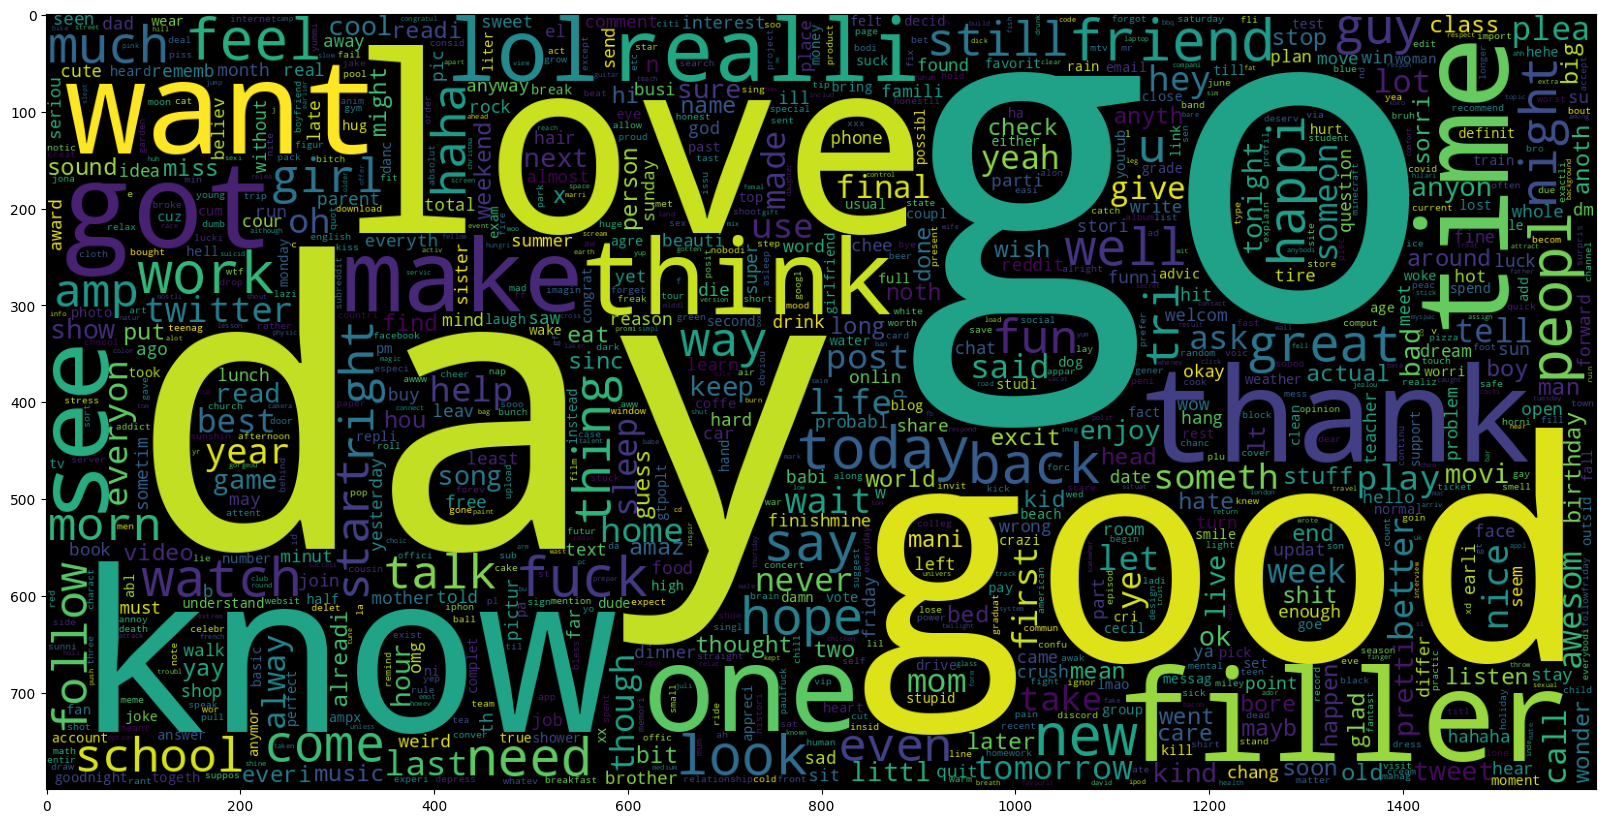

In [48]:
from wordcloud import WordCloud
plt.figure(figsize = (20, 18))
wc = WordCloud(max_words= 1000, width = 1600, height = 800,
              collocations = False).generate(" ".join(not_depr_text))
plt.imshow(wc)
plt.show()

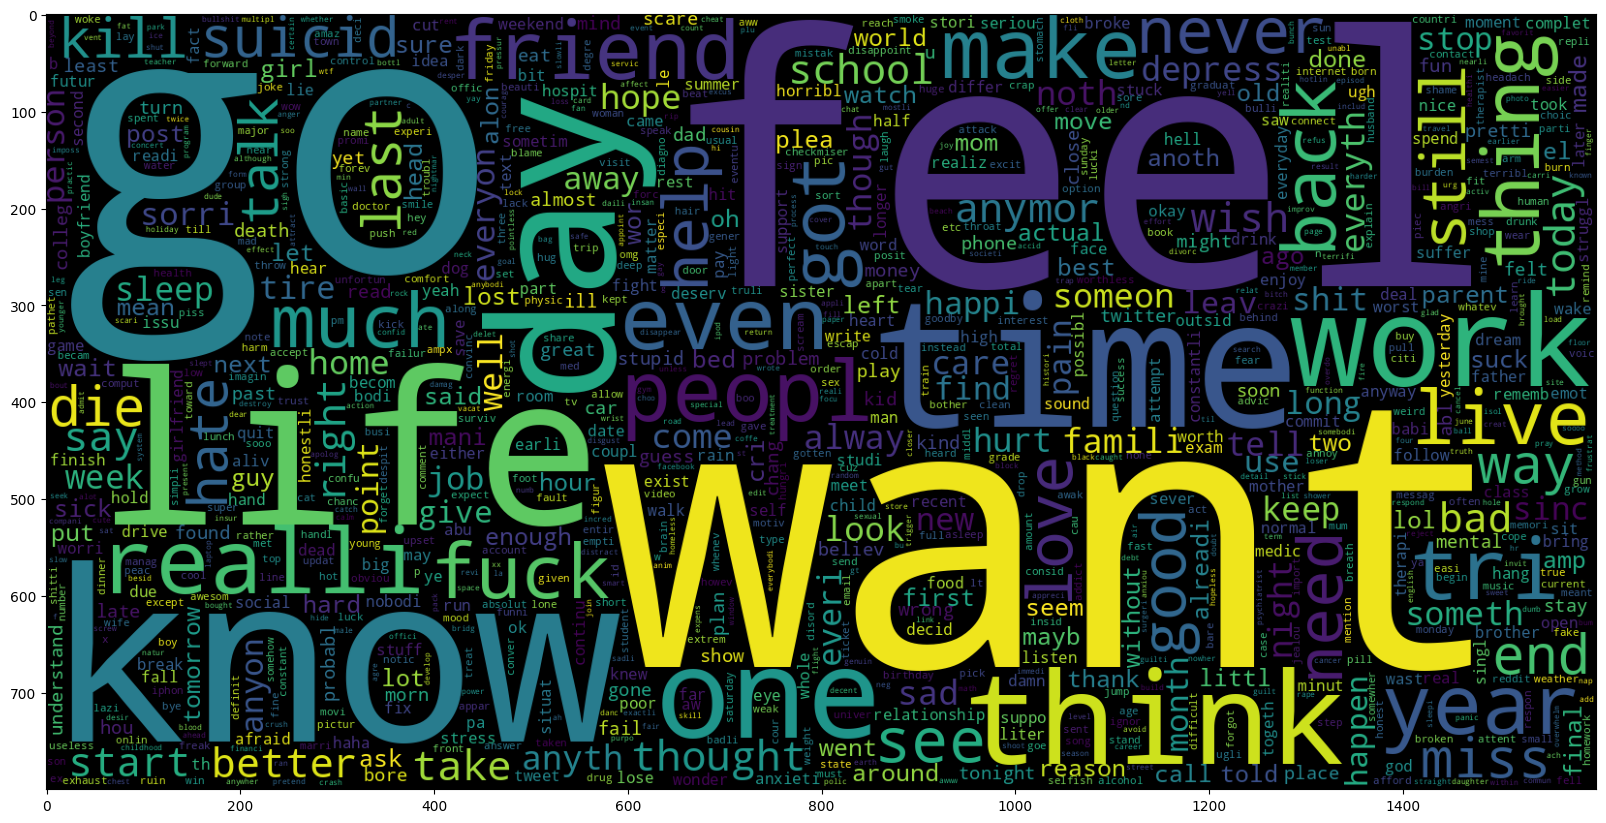

In [49]:
from wordcloud import WordCloud
plt.figure(figsize = (20, 18))
wc = WordCloud(max_words= 1000, width = 1600, height = 800,
              collocations = False).generate(" ".join(depr_text))
plt.imshow(wc)
plt.show()

In [50]:
# dataset1.to_pickle ("/content/drive/MyDrive/Colab Notebooks/VKR_Depression/Dataset/preprocessing_tweets.pkl")
# dataset2.to_pickle ("/content/drive/MyDrive/Colab Notebooks/VKR_Depression/Dataset/preprocessing_suicide.pkl")

# dataset1.to_csv('/content/drive/MyDrive/Colab Notebooks/VKR_Depression/Dataset/preprocessing_tweets.csv', header=True, sep=';')
# dataset2.to_csv('/content/drive/MyDrive/Colab Notebooks/VKR_Depression/Dataset/preprocessing_suicide.csv', header=True, sep=';')


# dataset2.to_csv('/content/drive/MyDrive/Colab Notebooks/VKR_Depression/Dataset/preprocessing_suicide.csv',index=False)



combined_df.to_csv('/content/drive/MyDrive/Colab Notebooks/VKR_Depression/Dataset/combined_df.csv')
combined_df.to_pickle ("/content/drive/MyDrive/Colab Notebooks/VKR_Depression/Dataset/combined_df.pkl")

combined_df2.to_csv('/content/drive/MyDrive/Colab Notebooks/VKR_Depression/Dataset/combined_df2.csv')
combined_df2.to_pickle ("/content/drive/MyDrive/Colab Notebooks/VKR_Depression/Dataset/combined_df2.pkl")


# Загрузка обработанного датасета

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
dataset1= pd.read_pickle ("/content/drive/MyDrive/Colab Notebooks/VKR_Depression/Dataset/preprocessing_tweets.pkl")
dataset2= pd.read_pickle ("/content/drive/MyDrive/Colab Notebooks/VKR_Depression/Dataset/preprocessing_suicide.pkl")


In [ ]:
max_length=max(dataset2.preprocess_text)


In [ ]:

print(len(max_length)) 

